## SCRAPING SITO DEL CENTRO RICERCA SEMEION

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "http://www.semeion.it/wordpress/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Home - Semeion


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res

['http://www.semeion.it/wordpress/halland-sweden-case-study/',
 'http://www.semeion.it/wordpress/simulation-prescriptive-analytics-references/',
 'http://www.semeion.it/wordpress/a-c-m/',
 'http://www.semeion.it/wordpress/awit/',
 'http://www.semeion.it/wordpress/2020/03/17/artificial-intelligence-precision-health-from-concept-to-applications/',
 'http://www.semeion.it/wordpress/orientamento-professionale/',
 'http://www.semeion.it/wordpress/research-software/',
 'http://www.semeion.it/wordpress/mapping-fractional-landscape/',
 'http://www.semeion.it/wordpress/unsupervised-algorithms-simulation/',
 'http://www.semeion.it/wordpress/2019/11/04/intervista-sapere-le-arti/',
 'http://www.semeion.it/wordpress/theory-of-impossible-worlds/',
 'http://www.semeion.it/wordpress/selfie-ann/',
 'http://www.semeion.it/wordpress/acs-semeion/',
 'http://www.semeion.it/wordpress/twist-international-patent/',
 'http://www.semeion.it/wordpress/coursi-per-managers/',
 'http://www.semeion.it/wordpress/2020

In [4]:
matchers = ['artificial-intelligence','projects']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['http://www.semeion.it/wordpress/2020/02/17/artificial-intelligence-at-the-service-of-business-people/',
 'http://www.semeion.it/wordpress/2020/09/11/artificial-intelligence-academy-semeion-talk/',
 'http://www.semeion.it/wordpress/2020/10/10/artificial-intelligence-to-design-collaborative-strategy-an-application-to-urban-destinations/',
 'http://www.semeion.it/wordpress/2020/09/08/artificial-intelligence-academy-5-30-pm-thursday-10-september-semeion-intervention-registration-for-live-streaming-is-open/',
 'http://www.semeion.it/wordpress/2020/03/17/artificial-intelligence-precision-health-from-concept-to-applications/']

In [5]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Intelligenza Artificiale a Servizio di chi fa Impresa - 19 Febbraio - Semeion',
 'Artificial Intelligence Academy – Conferenza del Semeion – video della diretta - Semeion',
 'Artificial intelligence to design collaborative strategy: An application to urban destinations - Semeion',
 'Artificial Intelligence Academy - 17,30 giovedì 10 settembre - Conferenza del Semeion - Sono aperte le iscrizioni per la diretta streaming - Semeion',
 'Artificial Intelligence in Precision Health : From Concept to Applications - Semeion']

In [6]:
print(texts[0])






Intelligenza Artificiale a Servizio di chi fa Impresa – 19 Febbraio

17 febbraio 202018 febbraio 2020  


Info e prenotazioni 3338095214 – Casa Riese . Treviso






Navigazione articoli
WIRED  DIGITAL DAY – Conferenza 11 Febbraio 2020 Teatro Petruzzelli BariArtificial Intelligence in Precision Health : From Concept to Applications






Search for:




.qtranxs_widget ul { margin: 0; }
.qtranxs_widget ul li
{
display: inline; /* horizontal list, use "list-item" or other appropriate value for vertical list */
list-style-type: none; /* use "initial" or other to enable bullets */
margin: 0 5px 0 0; /* adjust spacing between items */
opacity: 0.5;
-o-transition: 1s ease opacity;
-moz-transition: 1s ease opacity;
-webkit-transition: 1s ease opacity;
transition: 1s ease opacity;
}
/* .qtranxs_widget ul li span { margin: 0 5px 0 0; } */ /* other way to control spacing */
.qtranxs_widget ul li.active { opacity: 0.8; }
.qtranxs_widget ul li:hover { opacity: 1; }
.qtranxs_widget img { box-

### TEXT CLEANING

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

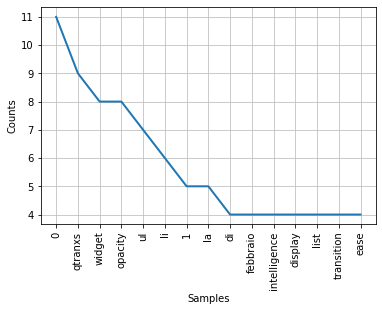

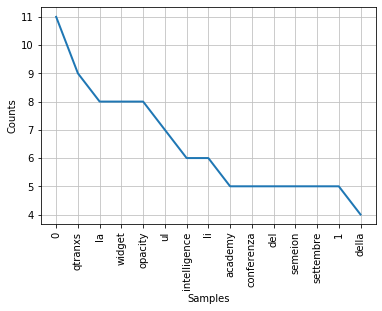

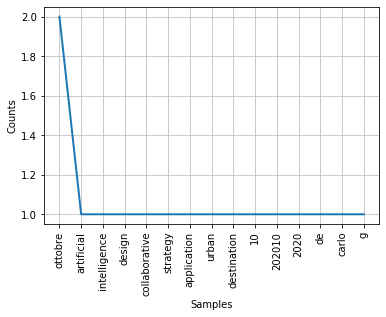

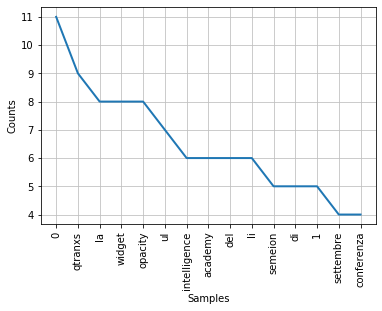

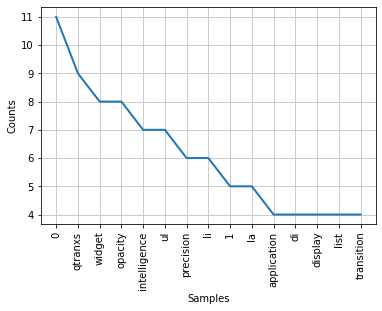

In [9]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

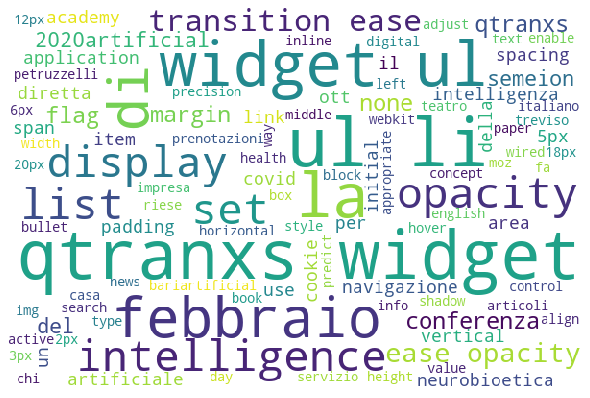

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

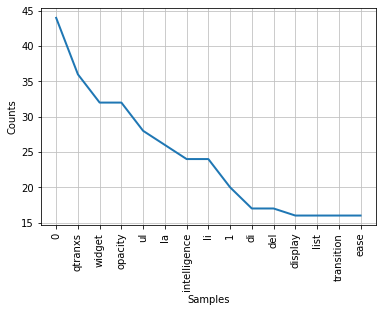

In [11]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

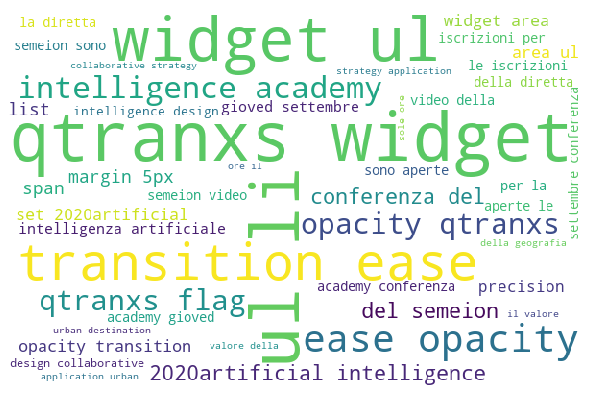

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [13]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [14]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'intelligenza': 9.8504},
 {'artificiale': 9.8504},
 {'servizio': 11.6578},
 {'di': 8.5703},
 {'chi': 11.6578},
 {'fa': 11.6578},
 {'impresa': 11.6578},
 {'19': 9.8504},
 {'febbraio': 10.6578},
 {'17': 9.6578},
 {'202018': 12.6578},
 {'2020': 9.0728},
 {'info': 12.6578},
 {'e': 9.4878},
 {'prenotazioni': 12.6578},
 {'3338095214': 12.6578},
 {'casa': 12.6578},
 {'riese': 12.6578},
 {'treviso': 12.6578},
 {'navigazione': 9.6578},
 {'articoli': 10.6578},
 {'wired': 12.6578},
 {'digital': 11.6578},
 {'day': 12.6578},
 {'conferenza': 8.8504},
 {'11': 9.3358},
 {'teatro': 12.6578},
 {'petruzzelli': 12.6578},
 {'bariartificial': 12.6578},
 {'intelligence': 8.0728},
 {'precision': 9.8504},
 {'health': 10.6578},
 {'concept': 11.0728},
 {'application': 9.4878},
 {'search': 10.6578},
 {'qtranxs': 7.4878},
 {'widget': 7.6578},
 {'ul': 7.8504},
 {'margin': 9.0728},
 {'0': 7.1983},
 {'li': 8.0728},
 {'display': 8.6578},
 {'inline': 10.6578},
 {'horizontal': 10.6578},
 {'list': 8.6578},
 {'use': 9.6

In [15]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'0': 7.1983},
 {'qtranxs': 7.4878},
 {'widget': 7.6578},
 {'opacity': 7.6578},
 {'widget': 7.6578},
 {'opacity': 7.6578},
 {'ul': 7.8504},
 {'la': 7.9573},
 {'intelligence': 8.0728},
 {'li': 8.0728},
 {'intelligence': 8.0728},
 {'li': 8.0728},
 {'1': 8.3358},
 {'di': 8.5703},
 {'del': 8.5703},
 {'di': 8.5703},
 {'del': 8.5703},
 {'display': 8.6578},
 {'list': 8.6578},
 {'transition': 8.6578},
 {'ease': 8.6578},
 {'set': 8.6578},
 {'display': 8.6578},
 {'list': 8.6578},
 {'transition': 8.6578},
 {'ease': 8.6578},
 {'set': 8.6578},
 {'display': 8.6578},
 {'list': 8.6578},
 {'transition': 8.6578},
 {'ease': 8.6578},
 {'set': 8.6578},
 {'display': 8.6578},
 {'list': 8.6578},
 {'transition': 8.6578},
 {'ease': 8.6578},
 {'set': 8.6578},
 {'display': 8.6578},
 {'list': 8.6578},
 {'transition': 8.6578},
 {'ease': 8.6578},
 {'set': 8.6578},
 {'academy': 8.7509},
 {'conferenza': 8.8504},
 {'semeion': 8.9573},
 {'2020': 9.0728},
 {'margin': 9.0728},
 {'none': 9.0728},
 {'flag': 9.0728},
 {'202